In [1]:
import os
os.chdir(r"C:\DataScienceModels\AttritionUseCase")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('attrition_aggregated.csv',index_col=0)

In [4]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 1 to 624
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill                      593 non-null    object
 1   Month                      624 non-null    object
 2   Total number of resources  624 non-null    int64 
 3   Total attrition            624 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.4+ KB


In [6]:
df.shape

(624, 4)

In [7]:
df.describe()

,Total number of resources,Total attrition
count,624.000000,624.000000
mean,54.099359,1.838141
std,62.850275,2.697318
min,1.000000,0.000000
25%,8.000000,0.000000
50%,25.000000,1.000000
75%,79.000000,2.000000
max,286.000000,21.000000


In [8]:
df.columns

Index(['Skill', 'Month', 'Total number of resources', 'Total attrition'], dtype='object')

In [9]:
df.isnull().any()

Skill                         True
Month                        False
Total number of resources    False
Total attrition              False
dtype: bool

In [10]:
df[df['Skill'].isnull()]

,Skill,Month,Total number of resources,Total attrition
594,NaN,31-01-2018,1,0
595,NaN,28-02-2018,1,0
596,NaN,31-03-2018,1,0
597,NaN,30-04-2018,6,1
598,NaN,31-05-2018,5,0
599,NaN,30-06-2018,8,2
600,NaN,31-07-2018,8,1
601,NaN,31-08-2018,10,1
602,NaN,30-09-2018,12,0
603,NaN,31-10-2018,15,0


In [11]:
len(df[df['Skill'].isnull()])

31

In [12]:
df_base = df.copy

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(593, 4)

In [15]:
df.isnull().any().sum()

0

In [16]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [17]:
df_skill_summary = df.groupby("Skill")["Total number of resources", "Total attrition"].sum()

<ipython-input-17-b3b0b5389c56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_skill_summary = df.groupby("Skill")["Total number of resources", "Total attrition"].sum()


In [26]:
df_skill_summary.sort_values(['Total attrition'])

,Skill,Total number of resources,Total attrition
2,ARCHITECT,85,3
9,L1/L2/L3,114,6
12,NFT,123,6
5,CLOUD,101,8
7,DIGITAL,476,18
14,PM,735,23
15,SCM/DEVOPS,389,23
16,SOA,593,27
11,MAINFRAME,1322,27
1,AGILE,667,32


In [18]:
df_skill_summary = df_skill_summary.reset_index()

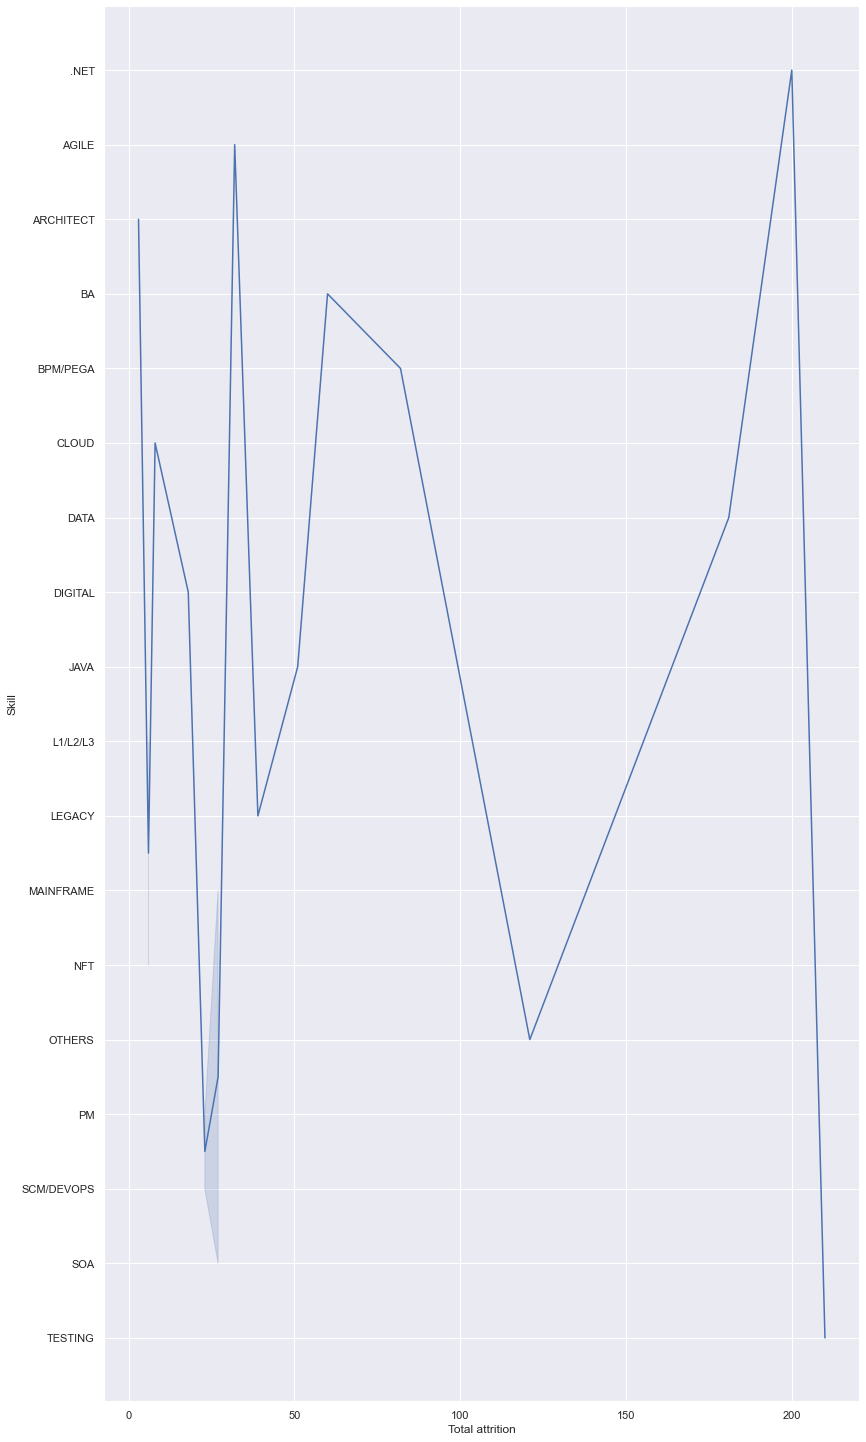

In [20]:
#plt.rcParams['figure.figsize']=(40,30)
sns.set_theme(style="darkgrid")
sns.relplot(x="Total attrition",y="Skill",kind="line",data=df_skill_summary,height=20, aspect=0.6)

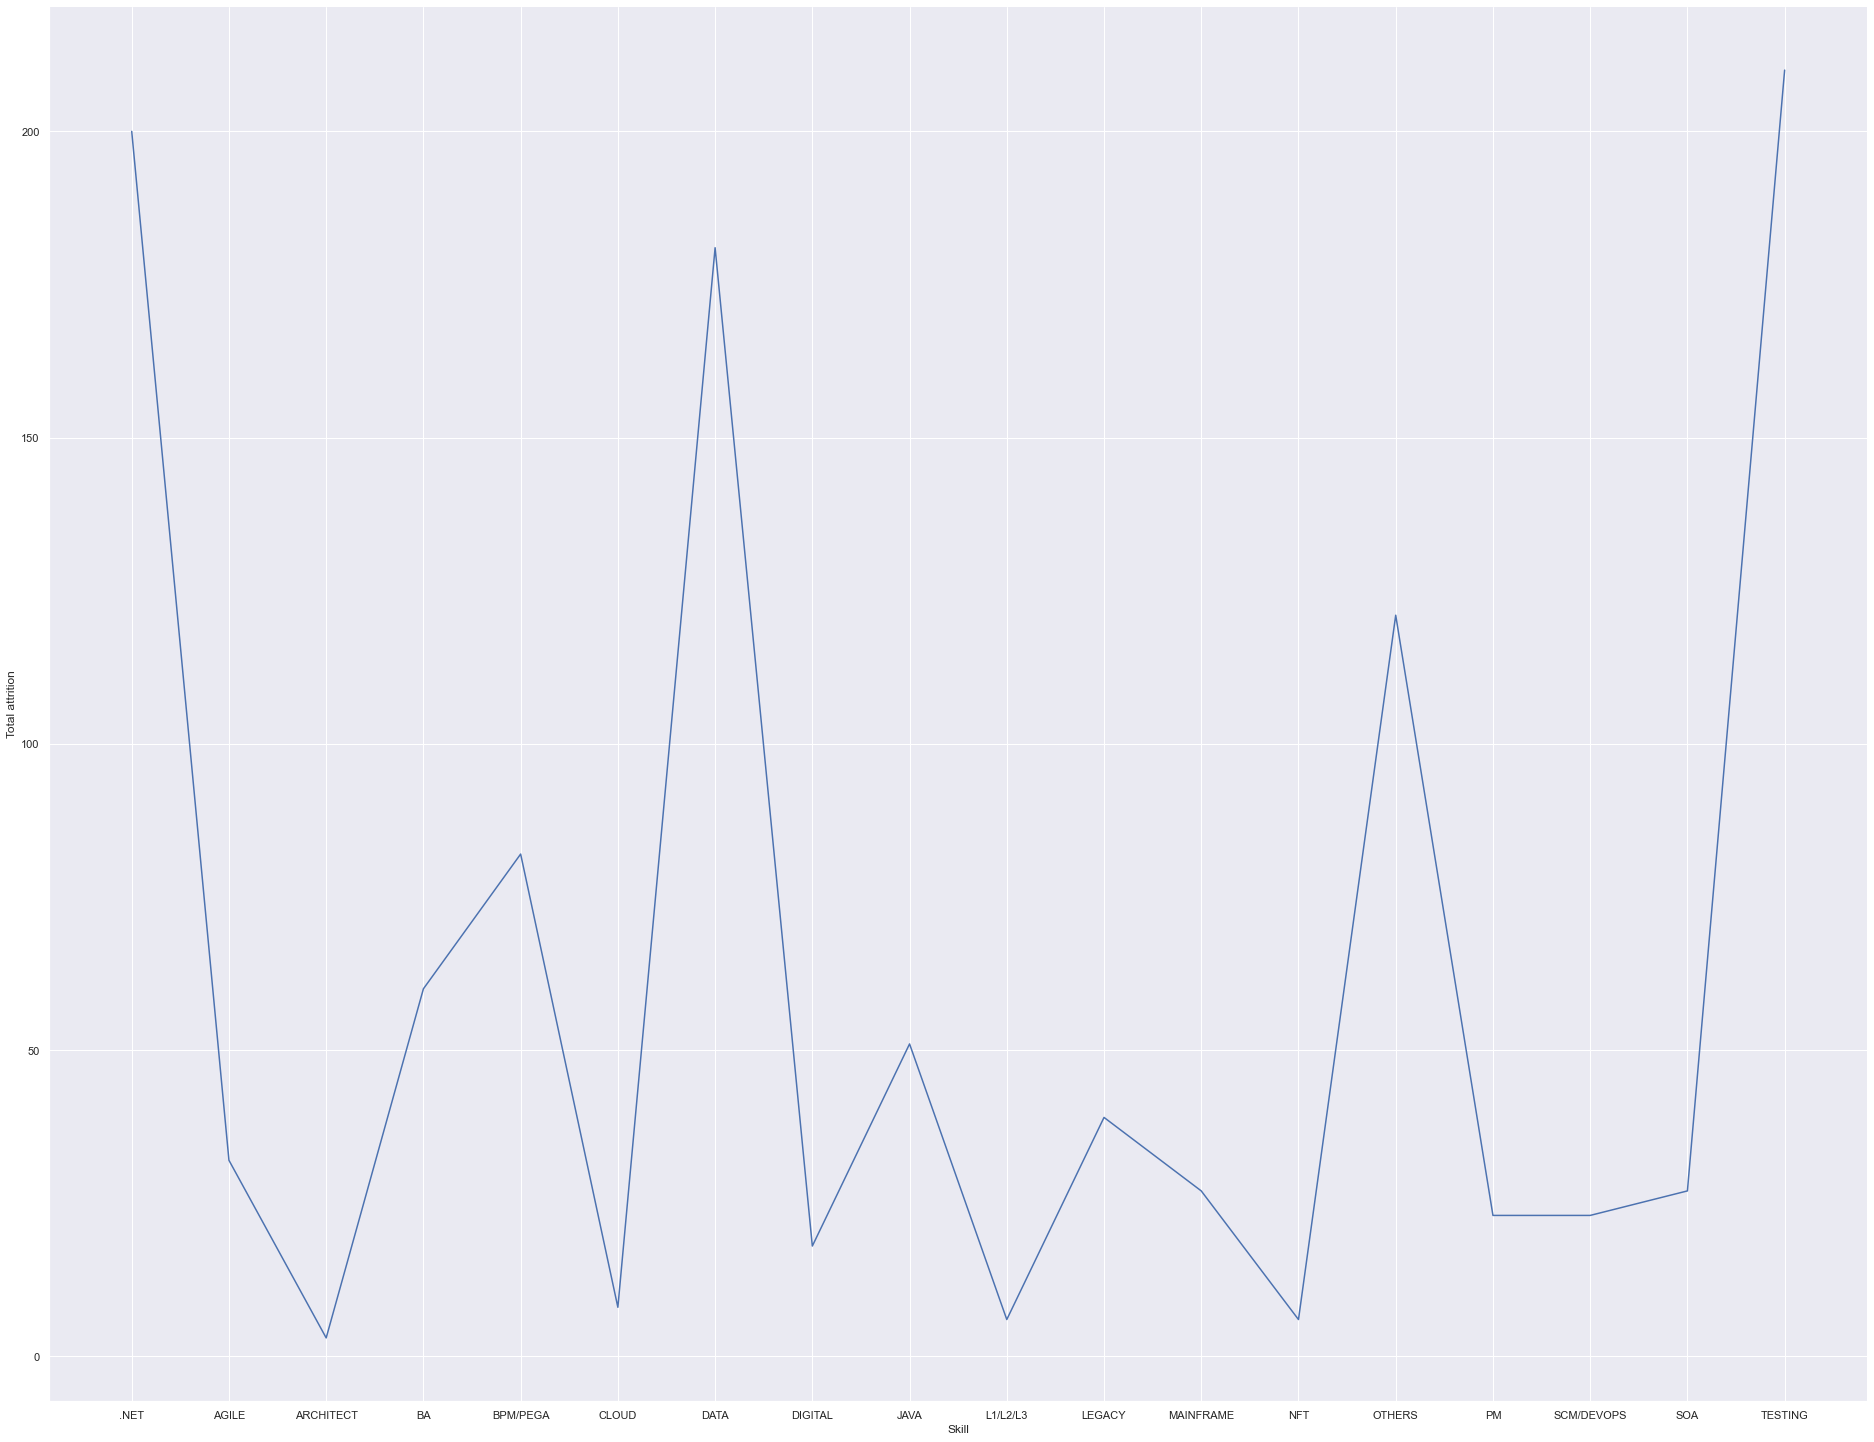

In [33]:
#sns.set_theme(style="darkgrid")
#sns.color_palette("hls", 8)
sns.relplot(y="Total attrition",x="Skill",kind="line",data=df_skill_summary,height=20, aspect=1.3)

<ipython-input-56-2497402ab4e2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 25)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TESTING'),
  Text(1, 0, '.NET'),
  Text(2, 0, 'DATA'),
  Text(3, 0, 'OTHERS'),
  Text(4, 0, 'BPM/PEGA'),
  Text(5, 0, 'BA'),
  Text(6, 0, 'JAVA'),
  Text(7, 0, 'LEGACY'),
  Text(8, 0, 'AGILE'),
  Text(9, 0, 'MAINFRAME'),
  Text(10, 0, 'SOA'),
  Text(11, 0, 'PM'),
  Text(12, 0, 'SCM/DEVOPS'),
  Text(13, 0, 'DIGITAL'),
  Text(14, 0, 'CLOUD'),
  Text(15, 0, 'NFT'),
  Text(16, 0, 'L1/L2/L3'),
  Text(17, 0, 'ARCHITECT')])

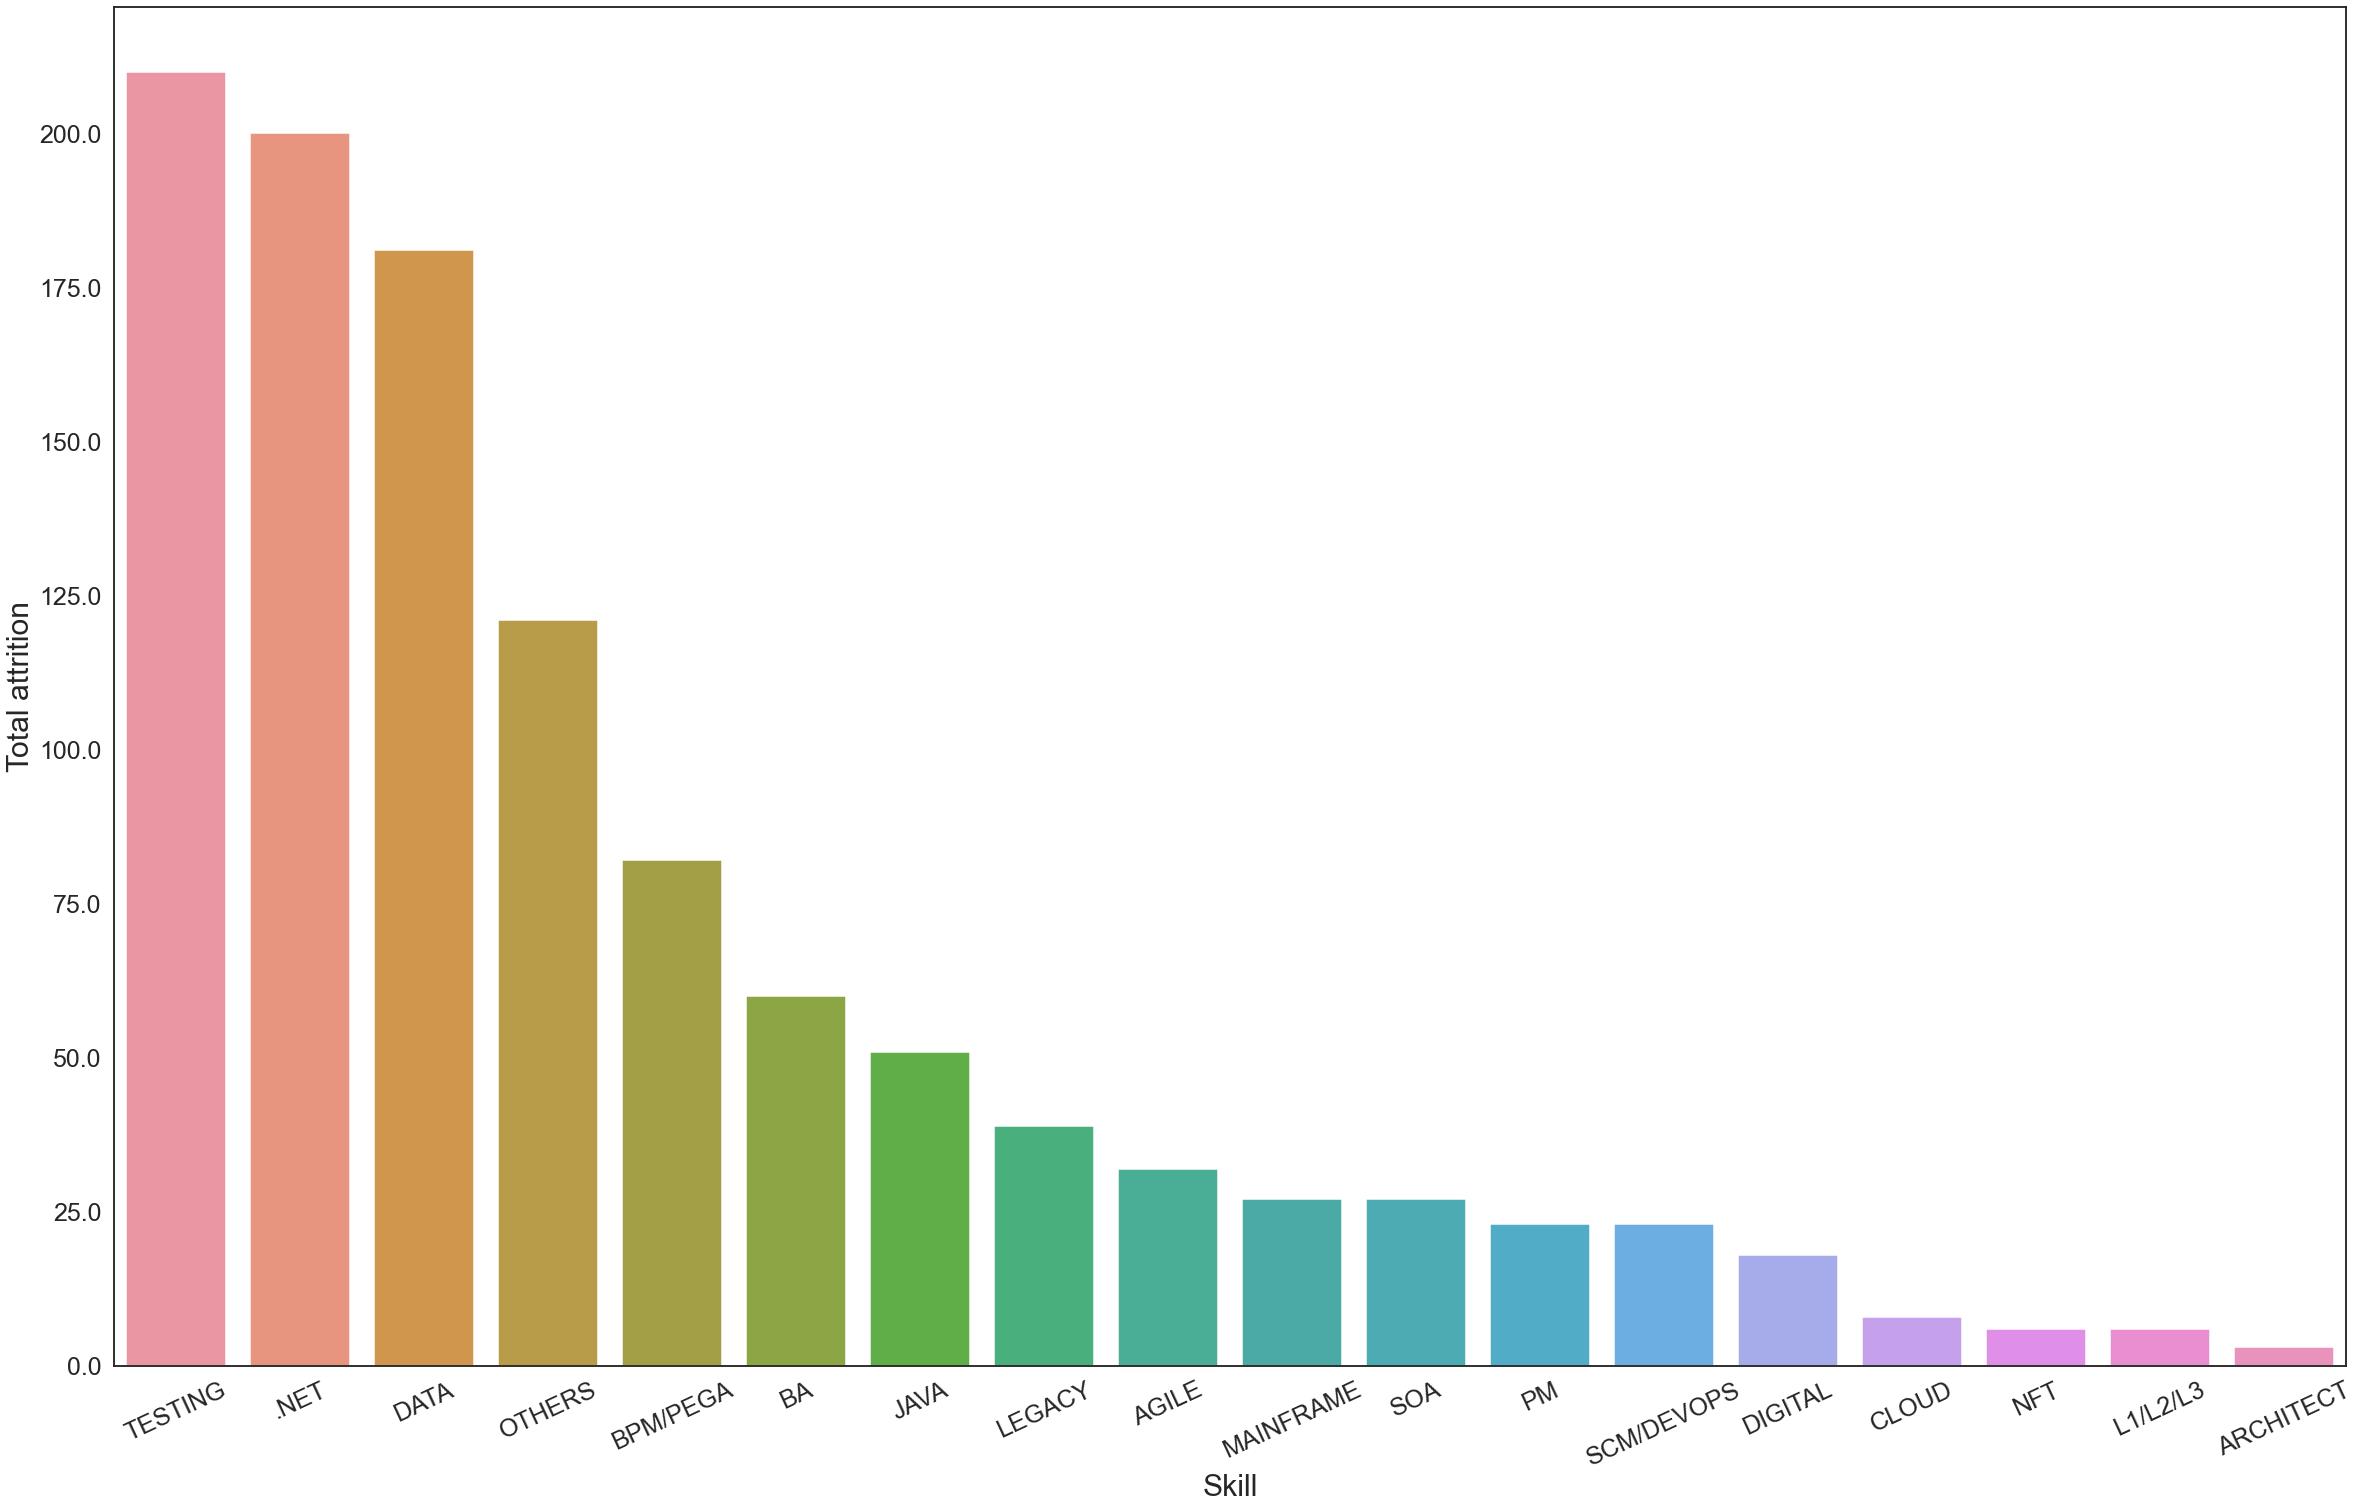

In [56]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(40,25))
b = sns.barplot(x = 'Skill',y='Total attrition',data = df_skill_summary.sort_values(['Total attrition'],ascending = False) )
b.set_yticklabels(b.get_yticks(), size = 25)
#b.set_xticklabels(b.get_xticks(), size = 25)
_, ylabels = plt.yticks()
#_, xlabels = plt.xticks()
_, xlabels = plt.xticks()
b.set_xticklabels(xlabels, size=25)
b.set_xlabel("Skill",fontsize=30)
b.set_ylabel("Total attrition",fontsize=30)
plt.xticks(rotation = 25)

In [39]:
df_skill_summary.sort_values(['Total attrition'])

,Skill,Total number of resources,Total attrition
2,ARCHITECT,85,3
9,L1/L2/L3,114,6
12,NFT,123,6
5,CLOUD,101,8
7,DIGITAL,476,18
14,PM,735,23
15,SCM/DEVOPS,389,23
16,SOA,593,27
11,MAINFRAME,1322,27
1,AGILE,667,32


<AxesSubplot:xlabel='Skill', ylabel='Total attrition'>

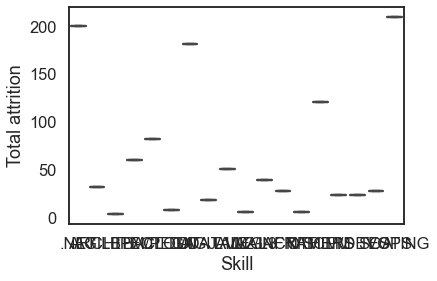

In [57]:
sns.boxplot(data=df_skill_summary, x='Skill', y='Total attrition')

<ipython-input-59-e0bc7843673b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 25)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TESTING'),
  Text(1, 0, '.NET'),
  Text(2, 0, 'DATA'),
  Text(3, 0, 'OTHERS'),
  Text(4, 0, 'BPM/PEGA'),
  Text(5, 0, 'BA'),
  Text(6, 0, 'MAINFRAME'),
  Text(7, 0, 'LEGACY'),
  Text(8, 0, 'JAVA'),
  Text(9, 0, 'PM'),
  Text(10, 0, 'AGILE'),
  Text(11, 0, 'SOA'),
  Text(12, 0, 'DIGITAL'),
  Text(13, 0, 'SCM/DEVOPS'),
  Text(14, 0, 'NFT'),
  Text(15, 0, 'L1/L2/L3'),
  Text(16, 0, 'CLOUD'),
  Text(17, 0, 'ARCHITECT')])

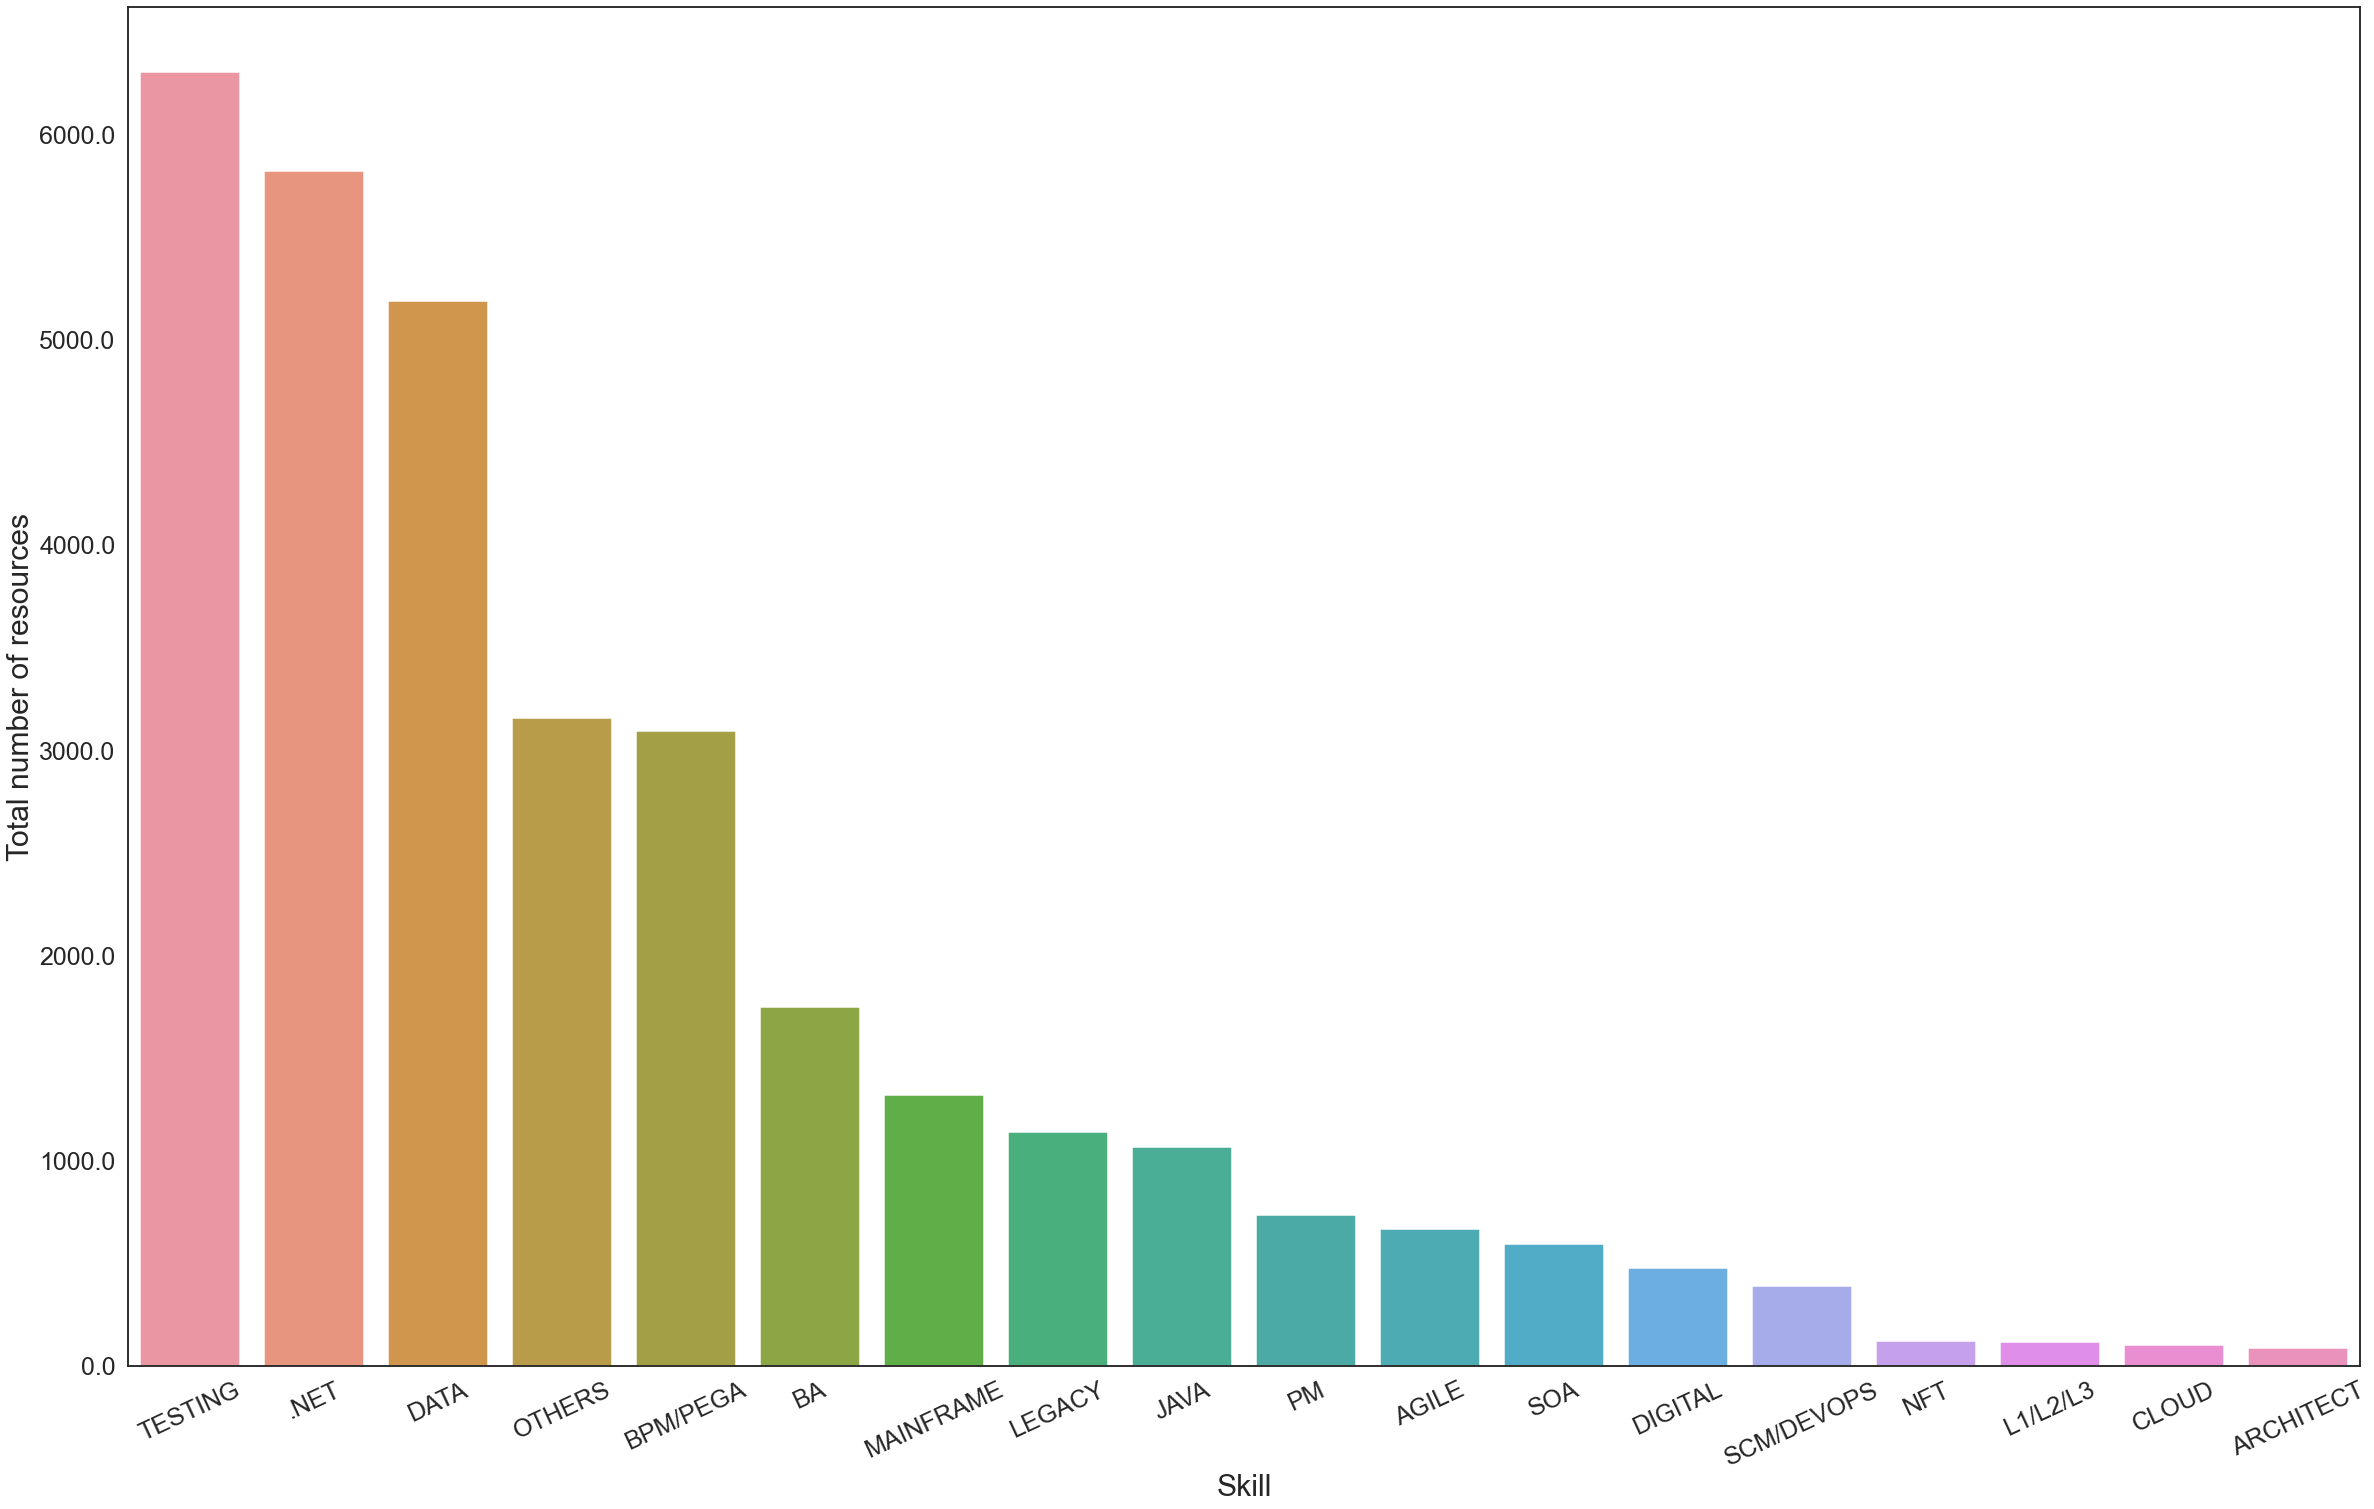

In [59]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(40,25))
b = sns.barplot(x = 'Skill',y='Total number of resources',data = df_skill_summary.sort_values(['Total number of resources'],ascending = False))
b.set_yticklabels(b.get_yticks(), size = 25)
#b.set_xticklabels(b.get_xticks(), size = 25)
_, ylabels = plt.yticks()
#_, xlabels = plt.xticks()
_, xlabels = plt.xticks()
b.set_xticklabels(xlabels, size=25)
b.set_xlabel("Skill",fontsize=30)
b.set_ylabel("Total number of resources",fontsize=30)
plt.xticks(rotation = 25)